In [1]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset

df=pd.read_csv('space_server.csv')
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


# Observations:

1. There are total of 18 attributes present in the dataset.

2. 'objid','ra','dec','u','g','r','i','z','spaceobjid' and 'redshift' columns are of float data types.

3. 'run','rerun','camcol','field','plate','mjd','fibreid' columns are of integer data types.

4. The target variable i.e. 'class' is of object data type.

5. In a nutshell, 17 attributes are numeric in nature and only 1 attribute is categorical in nature.

In [4]:
# Checking for null values, if any.
df.isnull().values.any()

False

Findings: There are no null values present in the dataset.

We can visualize it with heat map as well.

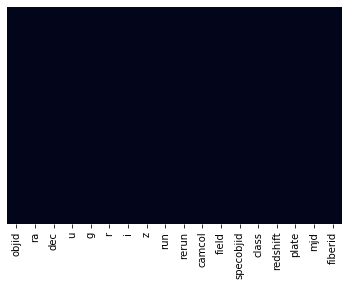

In [5]:
# Checking null values via visualization
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

Findings: From above figure, it is clear that there are no null values present in the dataset.

In [6]:
# Checking columns
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [7]:
# Checking unique entries in each of the column.
df.nunique().to_frame().transpose()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1,10000,10000,9730,9817,9852,9890,9896,23,1,6,703,6349,3,9637,487,355,892


In [8]:
# Checking categories in target attribute i.e., 'class'.
df['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

The target variable consists of 3 categories i.e., 'STAR','GALAXY' and 'QSO', which means Quasar.

In [9]:
# Printing the object data types and their unique values
for column in df.columns:
    if df[column].dtype==object:
        print(str(column)+':'+str(df[column].unique()))
        print(df[column].value_counts())
        print('********************************************************')
        print('\n')

class:['STAR' 'GALAXY' 'QSO']
GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64
********************************************************




Findings: The target variable i.e., 'class' consists of 4998 no. of Galaxies, 4152 no. of Stars and 850 no. of Quasars

# For analyzing the data with target variable i.e. 'class' we have to change 'class' into numeric data type

In [10]:
# Changing the data type of target column.
df['class']=df['class'].map({'STAR': 0, 'GALAXY':1, 'QSO':2})
df['class'].dtypes

dtype('int64')

Note: We have changed the data type of target variable i.e. 'class' in which '0' stands for 'STAR', '1' stands for 'GALAXY' and '2' stands for 'QSO' i.e. Quasar.

In [11]:
df['class'].unique()

array([0, 1, 2], dtype=int64)

Observation: '0'-> STAR, '1'-> GALAXY, '2'-> QSO i.e., QUASAR

# Summary Statistics

In [12]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.669800,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.625465,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,0.000000,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000000,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,1.000000,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,1.000000,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,2.000000,5.353854,8410.000000,57481.000000,1000.000000


# Observations:

1. In columns 'ra' and 'camcol', mean is smaller than median therefore data is left-skewed in these attributes.

2. In columns 'dec','run','field','redshift','plate','mjd' and 'fibreid' mean is greater than median so data is right-skewed in these columns. 

3. Also, the difference between 75%ile and max. is large in columns 'dec','r','i','z','run','field','redshift','plate','mjd' and 'fibreid'. Hence, outliers are present these attributes.

# Checking the correlation between columns

In [13]:
df_cor=df.corr()
df_cor

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,1.442555e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,4.118918e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,9.124866e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,2.845415e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,3.573522e-01,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,2.786783e-01,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,2.053670e-01,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,1.494443e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,1.006273e-01,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here we can see the correlation between the columns. For better understanding we can see it via visualization(with the help of heatmap)

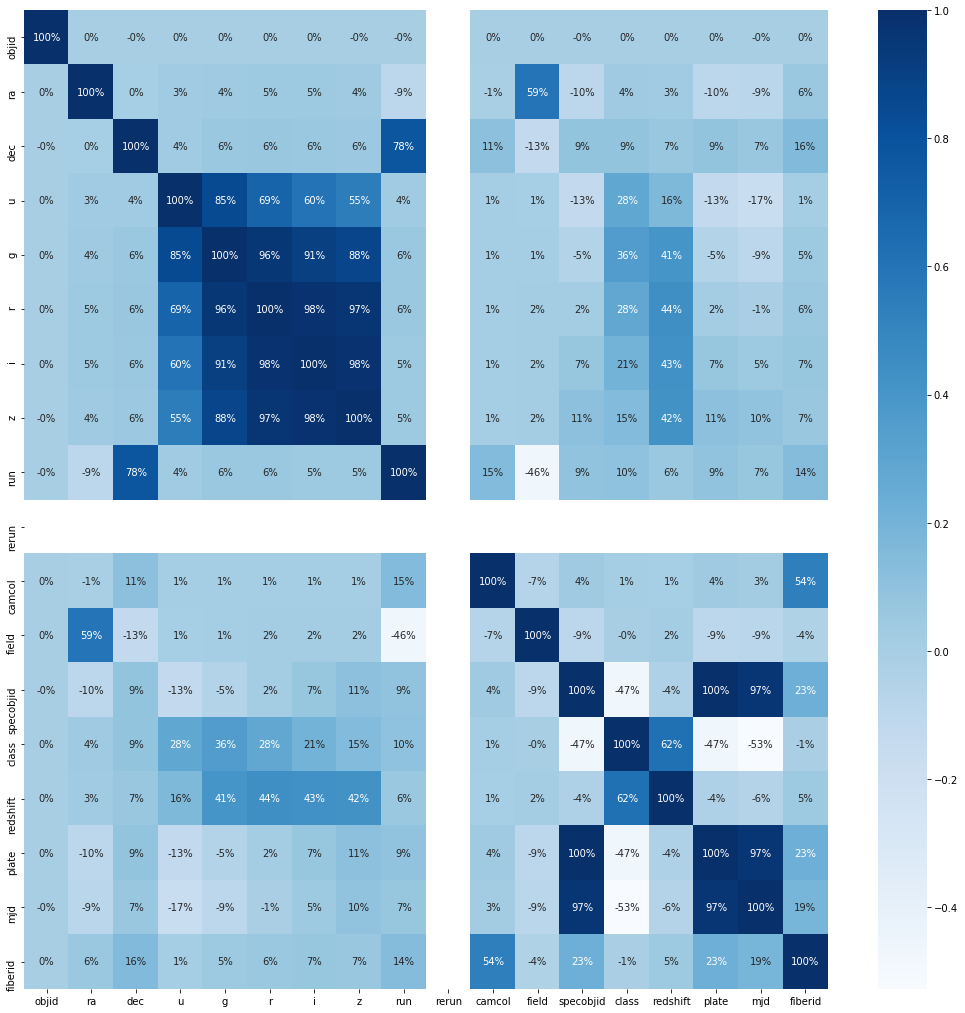

In [14]:
plt.figure(figsize=(18,18))
sns.heatmap(df_cor,annot=True,fmt='.0%',cmap='Blues')
plt.show()

# Observations:

1. 'rerun' column is showing absolutely no relation with any of the columns so we can remove it from the dataset.

2. 'objid' and 'field' columns shows zero correlation with target variable 'class'. So, we can also drop these columns.

3. 'u','g','r','i','z' and 'redshift' shows positive correlation with target variable, with 'redshift' showing positive correlation of 62%.

4. 'spaceobjid','plate' and 'mjd' shows strong negative correlation with target variable 'class'.

In [15]:
# Dropping unrelated columns or columns having zero correlation with target output i.e.,'class'
df.drop(['rerun', 'objid', 'field'], axis = 1, inplace=True) 

Text(0.5, 1.0, "Correlation with target variable i.e. 'class'")

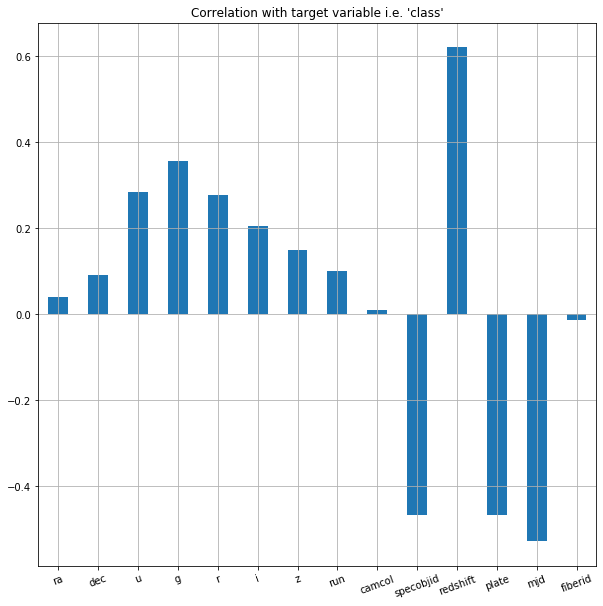

In [16]:
# Graphical representation of correlation of target variable with different columns.
plt.figure(figsize=(10,10))
df.drop('class',axis=1).corrwith(df['class']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("Correlation with target variable i.e. 'class'")

Observations:
1. 'rerun' column is showing absolutely no relation with any of the columns so we can remove it from the dataset.
2. 'objid' and 'field' columns shows zero correlation with target variable 'class'. So, we can also drop these columns.
3. 'u','g','r','i','z' and 'redshift' shows positive correlation with target variable, with 'redshift' showing positive correlation of 62%.
4. 'spaceobjid','plate' and 'mjd' shows strong negative correlation with target variable 'class'.

# Data Visualization

Our feature variable of interest is 'class'.

We already changed it into integer value as it contains only three numbers 0, 1 and 2.

 '0' stands for 'STAR', '1' stands for 'GALAXY' and '2' stands for 'QSO' i.e. Quasar.

# Univariate Analysis

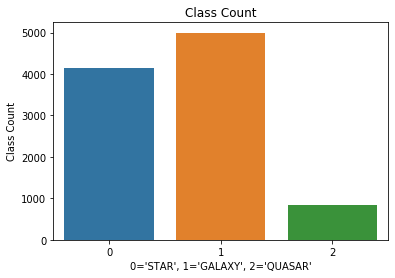

In [17]:
# Checking class count.
plt.subplots(figsize=(6,4))
sns.countplot(x='class',data=df)
plt.title("Class Count")
plt.xlabel("0='STAR', 1='GALAXY', 2='QUASAR'")
plt.ylabel("Class Count")
plt.show()

Observations:
1. Number of galaxies= 4998
2. Number of Stars=4152
3. Number of Quasars= 850

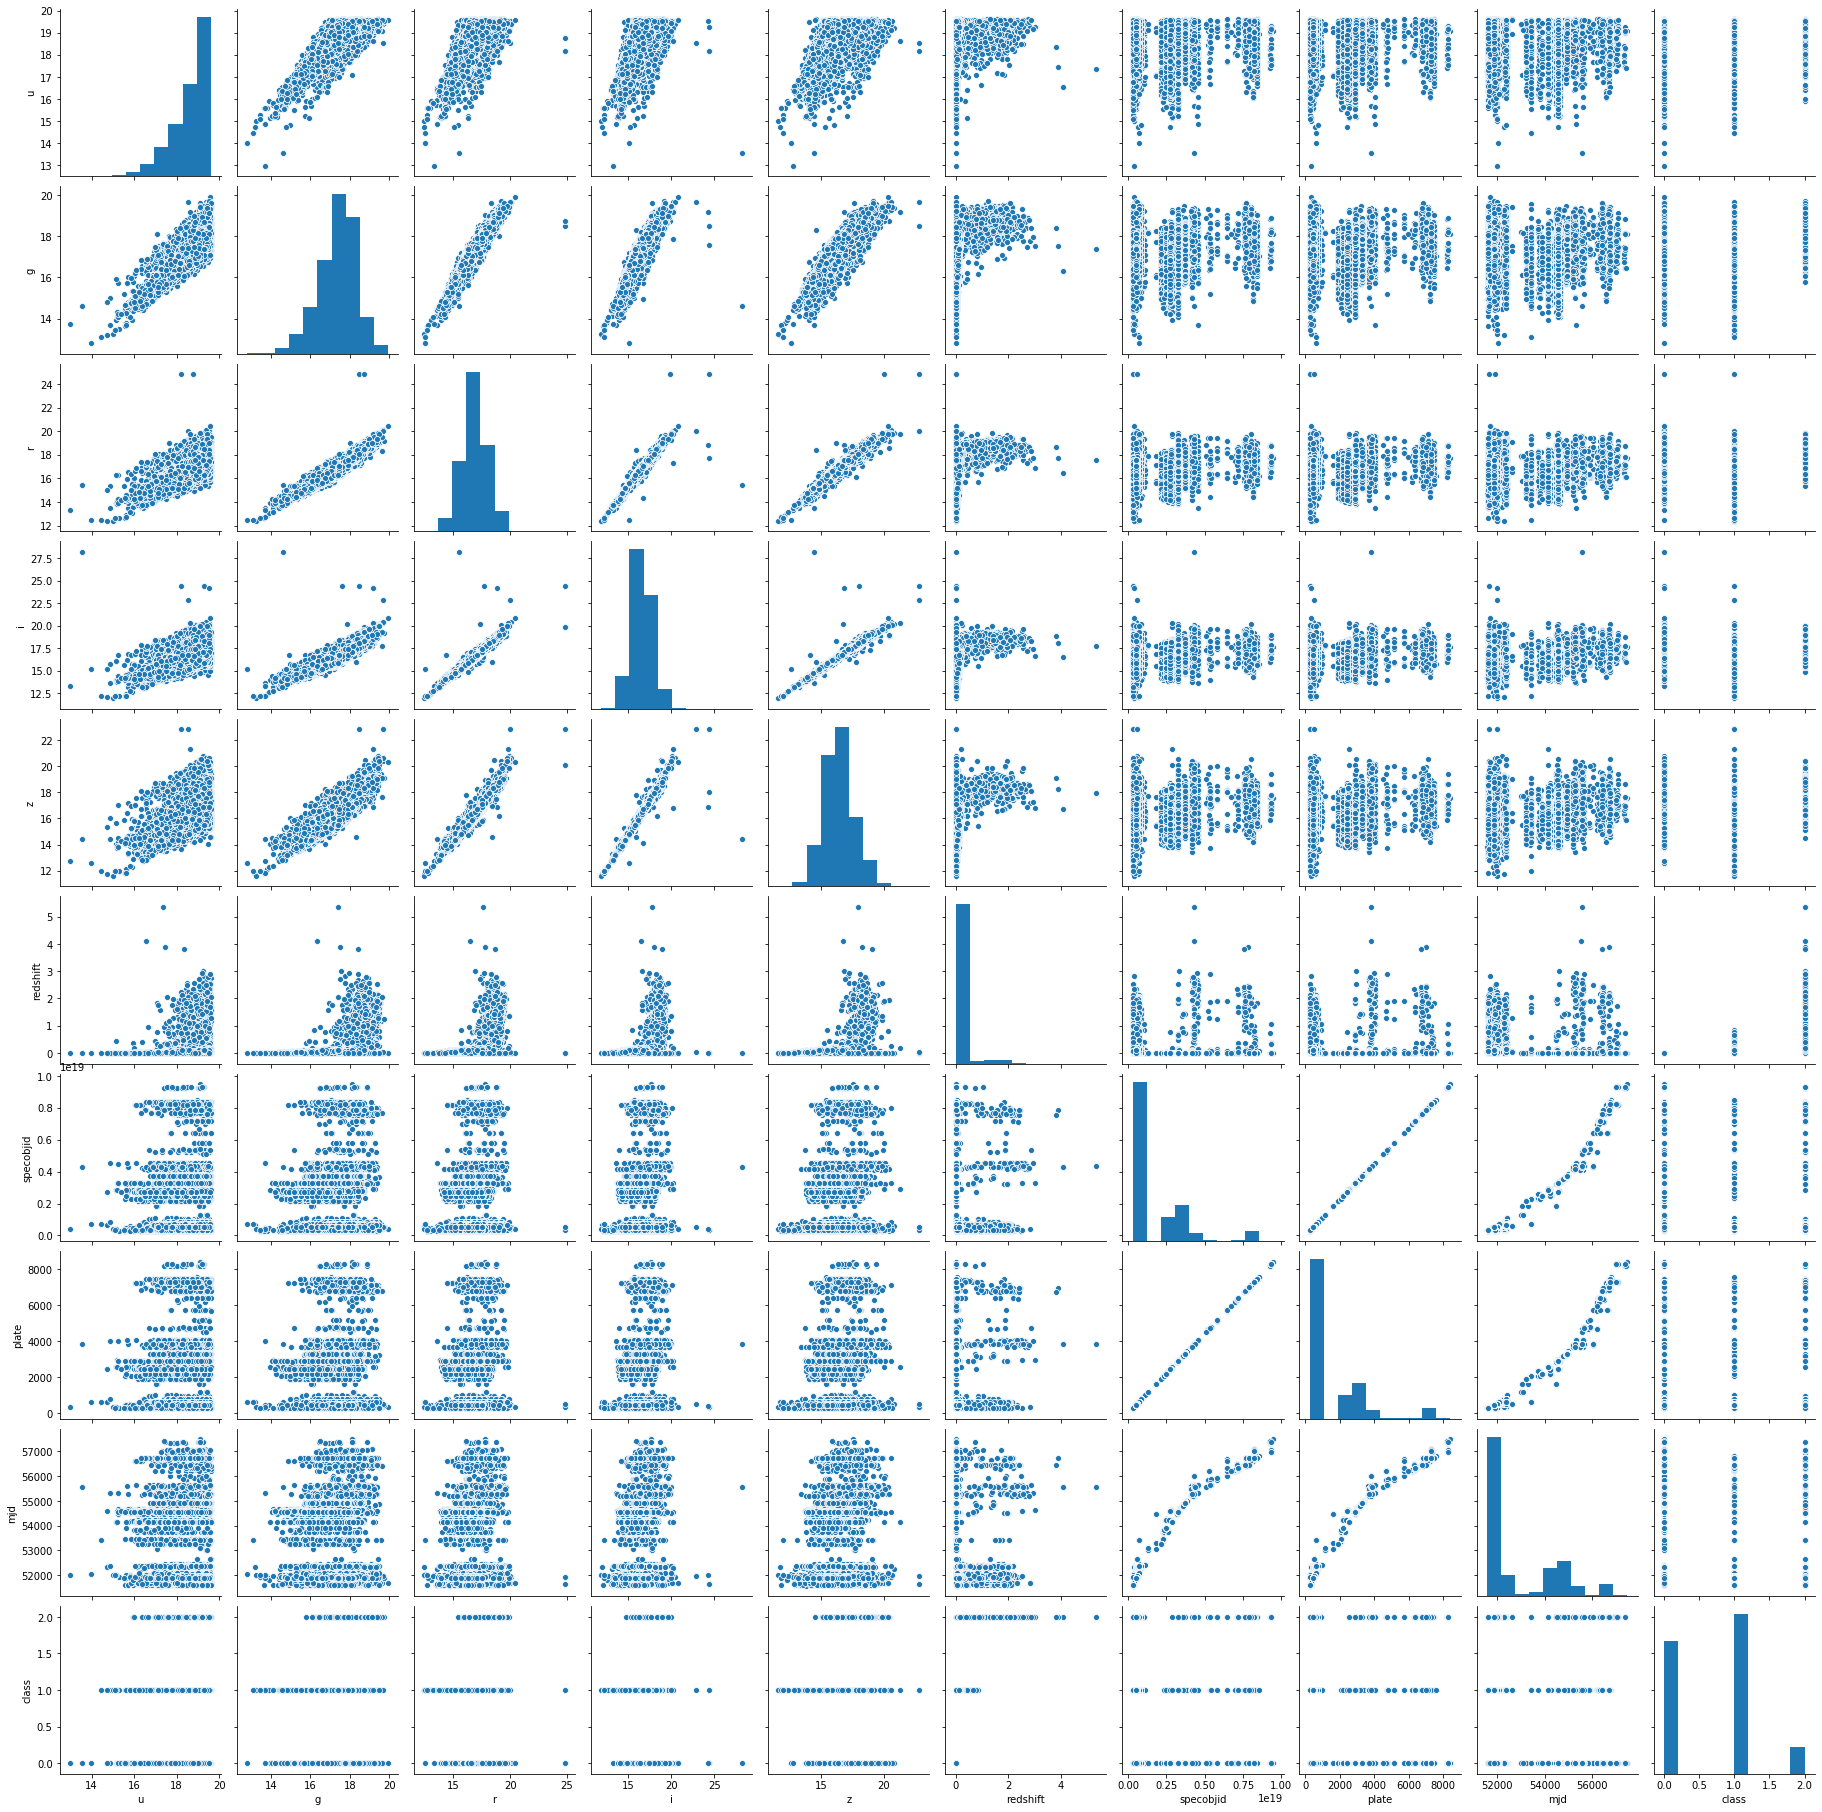

In [18]:
sns.pairplot(df[['u','g','r','i','z','redshift','specobjid','plate','mjd','class']])

# Checking skewness

In [19]:
#Checking skewness
df.skew()

ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
specobjid    1.794627
class        0.381391
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

In [20]:
# Treating skewness via square root and cube root method.
df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df[col].skew()>0.55:
            df[col]=np.sqrt(df[col])
        if df[col].skew()<-0.55:
            df[col]=np.cbrt(df[col])

In [21]:
# Checking skewness again
df.skew()

ra          -2.773755
dec          0.298224
u           -1.315798
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
specobjid    1.093905
class        0.381391
redshift     2.268173
plate        1.093870
mjd          1.025184
fiberid      0.308053
dtype: float64

In [22]:
df.head()

,ra,dec,u,g,r,i,z,run,camcol,specobjid,class,redshift,plate,mjd,fiberid
0,5.682901,0.299488,2.690412,17.04240,15.94699,15.50342,15.22531,752,4,1.929342e+09,0,NaN,57.497826,234.354432,491
1,5.683593,0.367811,2.652522,17.21449,16.67637,16.48922,16.39150,752,4,6.031700e+08,0,NaN,17.972201,227.189348,541
2,5.684437,0.355225,2.686211,18.19169,17.47428,17.08732,16.80125,752,4,5.685719e+08,1,0.350872,16.941074,228.085510,513
3,5.686400,0.223407,2.609304,16.60272,16.16116,15.98233,15.90438,752,4,1.929344e+09,0,NaN,57.497826,234.354432,510
4,5.686531,0.320245,2.598730,16.26342,16.43869,16.55492,16.61326,752,4,1.929344e+09,0,0.024297,57.497826,234.354432,512


In [23]:
df.isnull().sum()

ra              0
dec          3774
u               0
g               0
r               0
i               0
z               0
run             0
camcol          0
specobjid       0
class           0
redshift     1919
plate           0
mjd             0
fiberid         0
dtype: int64

In [24]:
# Imputing the missing value with their mean.
df['dec'].fillna(df['dec'].mean(),inplace=True)
df['redshift'].fillna(df['redshift'].mean(),inplace=True)

In [25]:
df.isnull().sum()

ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
camcol       0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

# Model Training

In [26]:
df.head()

,ra,dec,u,g,r,i,z,run,camcol,specobjid,class,redshift,plate,mjd,fiberid
0,5.682901,0.299488,2.690412,17.04240,15.94699,15.50342,15.22531,752,4,1.929342e+09,0,0.283614,57.497826,234.354432,491
1,5.683593,0.367811,2.652522,17.21449,16.67637,16.48922,16.39150,752,4,6.031700e+08,0,0.283614,17.972201,227.189348,541
2,5.684437,0.355225,2.686211,18.19169,17.47428,17.08732,16.80125,752,4,5.685719e+08,1,0.350872,16.941074,228.085510,513
3,5.686400,0.223407,2.609304,16.60272,16.16116,15.98233,15.90438,752,4,1.929344e+09,0,0.283614,57.497826,234.354432,510
4,5.686531,0.320245,2.598730,16.26342,16.43869,16.55492,16.61326,752,4,1.929344e+09,0,0.024297,57.497826,234.354432,512


In [27]:
# Splitting the data into input and output variable.
x=df.drop(columns=['class'],axis=1)
x.head()

,ra,dec,u,g,r,i,z,run,camcol,specobjid,redshift,plate,mjd,fiberid
0,5.682901,0.299488,2.690412,17.04240,15.94699,15.50342,15.22531,752,4,1.929342e+09,0.283614,57.497826,234.354432,491
1,5.683593,0.367811,2.652522,17.21449,16.67637,16.48922,16.39150,752,4,6.031700e+08,0.283614,17.972201,227.189348,541
2,5.684437,0.355225,2.686211,18.19169,17.47428,17.08732,16.80125,752,4,5.685719e+08,0.350872,16.941074,228.085510,513
3,5.686400,0.223407,2.609304,16.60272,16.16116,15.98233,15.90438,752,4,1.929344e+09,0.283614,57.497826,234.354432,510
4,5.686531,0.320245,2.598730,16.26342,16.43869,16.55492,16.61326,752,4,1.929344e+09,0.024297,57.497826,234.354432,512


In [28]:
y=df['class']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: class, dtype: int64

In [29]:
# Checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(10000, 14) 		 (10000,)


In [30]:
# Scaling in input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [31]:
# Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [32]:
#Checking the shape
print(x_train.shape,'\t\t',x_test.shape)

(8000, 14) 		 (2000, 14)


In [33]:
#Checking the shape
print(y_train.shape,'\t\t',y_test.shape)

(8000,) 		 (2000,)


In [34]:
# Importing all the model library

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Importing Boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score

In [35]:
# All algorithm by using for loop

model=[SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('************************************************************************************')
    print('\n')

Accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
0.9405
[[755  74   1]
 [ 29 966   5]
 [  2   8 160]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       830
           1       0.92      0.97      0.94      1000
           2       0.96      0.94      0.95       170

    accuracy                           0.94      2000
   macro avg       0.95      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

************************************************************************************


Accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity

In [36]:
# Cross validate the models

models=[SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in models:
    score=cross_val_score(m,x,y,cv=15,scoring='accuracy')
    print('Model:',m)
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('Standard deviation:',score.std())
    print('************************************************************************************')
    print('\n')

Model: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Score: [0.96101949 0.94002999 0.94302849 0.96101949 0.95502249 0.92803598
 0.92353823 0.94602699 0.92803598 0.94152924 0.8993994  0.95195195
 0.96096096 0.94444444 0.94594595]
Mean Score: 0.9419992706349528
Standard deviation: 0.016207375028614808
************************************************************************************


Model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_sta

# Using GridSearchCV to find out the best parameter in GradientBoostingClassifier

In [37]:
from sklearn.model_selection import GridSearchCV

parameters={"learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],"n_estimators":[100]}
gbc=GradientBoostingClassifier()

clf=GridSearchCV(gbc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'learning_rate': 0.05, 'n_estimators': 100}


In [38]:
# GradientBoostingClassifier with best parameters

gbc=GradientBoostingClassifier(learning_rate=0.05, n_estimators=100)
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
predgbc=gbc.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.9905
[[829   1   0]
 [  2 988  10]
 [  0   6 164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       830
           1       0.99      0.99      0.99      1000
           2       0.94      0.96      0.95       170

    accuracy                           0.99      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000



In [39]:
# Cross Validate GradientBoostingClassifier

score=cross_val_score(gbc,x,y,cv=5,scoring='accuracy')

print(score)
print('Mean:',score.mean())
print('Std:',score.std())

[0.994  0.9915 0.991  0.9855 0.9895]
Mean: 0.9903000000000001
Std: 0.0028035691537752223


# Among all the models, GradientBoostingClassifier gives highest score so we adopt GradientBoostingClassifier as our final model.

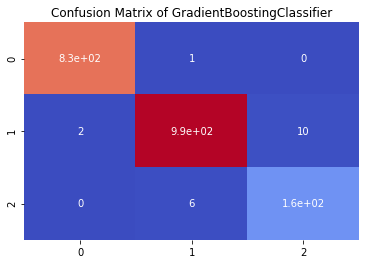

In [40]:
# Plotting confusion Matrix for GradientBoostingClassifier.
cm=confusion_matrix(y_test,predgbc)
sns.heatmap(cm,annot=True,cbar=False,cmap='coolwarm')

plt.title("Confusion Matrix of GradientBoostingClassifier")
plt.show()

# Conclusion:

1. Among all the models, GradientBoostingClassifier is giving best score.

2. Also, it is not suffering from underfitting and overfitting as we have cross-validated the same.

3. So, we save GradientBoostingClassifier as our final model.

In [41]:
# Saving the GradientBoosstingClassifier model
from sklearn.externals import joblib

# Saving the model as an object in a file.
joblib.dump(gbc,'space_server_gbc.obj')

['space_server_gbc.obj']

In [42]:
# Loading the model
gbc_from_joblib=joblib.load('space_server_gbc.obj')

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [43]:
# using the loaded model to make predictions

prediction= gbc_from_joblib.predict(x_test)
prediction

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [62]:
res = pd.DataFrame(prediction)
res.columns = ["prediction"]
res.to_csv("space_classification.csv")